In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data_fileB.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59539 entries, 0 to 59538
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         59539 non-null  int64  
 1   age                        59539 non-null  int64  
 2   status                     59539 non-null  object 
 3   gender                     59539 non-null  object 
 4   drinks                     56573 non-null  object 
 5   drugs                      45554 non-null  object 
 6   education                  52961 non-null  object 
 7   ethnicity                  53863 non-null  object 
 8   income                     59539 non-null  int64  
 9   last_online                59539 non-null  object 
 10  location                   59539 non-null  object 
 11  offspring                  24202 non-null  object 
 12  smokes                     54069 non-null  object 
 13  city                       0 non-null      flo

# Q1

-----

## <div dir='rtl'> <span style="color: #5A5A5A"> הציגו שני איורים אחד ליד השני. באיור הראשון הציגו את התפלגות הגילאים (age). הפרידו בצבע בין הגברים לנשים (gender). באיור השני הציגו את חציון הגילאים (age). הפרידו בצבע בין הגברים לנשים (gender).

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

# Create histograms for the 'Grade' column in df1 and df2 with titles
sns.boxplot(data = df1,y = 'Grade', ax = ax[0])
ax[0].set_title('Boxplot of Grades in df1')

sns.boxplot(data = df2,y = 'Grade', ax = ax[1])
ax[1].set_title('Boxplot of Grades in df2')

plt.show()

### ans

<AxesSubplot: xlabel='age', ylabel='Count'>

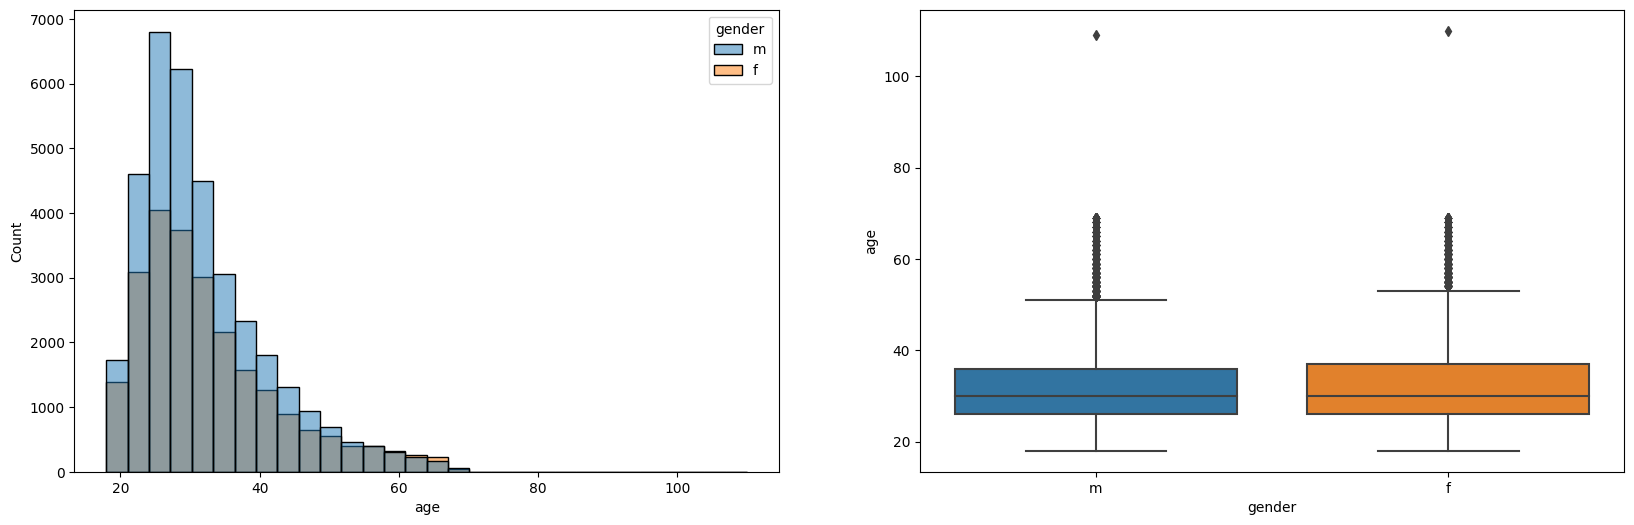

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(data=df, y="age", x="gender", ax = axes[1])
sns.histplot(data=df, x="age", hue="gender",  bins=30, ax = axes[0])

# Q2

## <div dir='rtl'> <span style="color: #5A5A5A">נתוני ההכנסה של המשתמשים משתנים בהתאם למצב מערכת היחסים ולמגדר. סננו את הנתונים כך שיכילו רק משתמשים עם הכנסות של בין 0-300,000 דולר (income). הציגו ארבעה גרפים, אחד לכל סטטוס יחסים (status). בכל גרף יש להציג את חציון ההכנסה(income)  לכל מגדר (gender). 

 

### ans

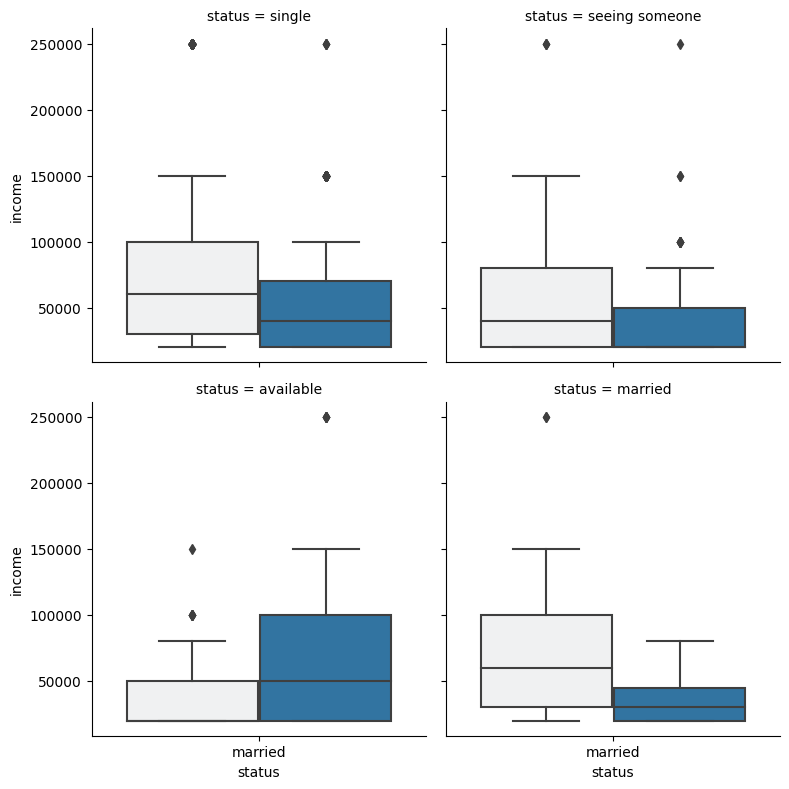

In [6]:


df3 = df[(df["income"] != -1) & (df["income"]<300000)]
# Create FacetGrid with 'status' as the column
g = sns.FacetGrid(df3, col="status", col_wrap=2, height=4, sharey=True)

# Map bar plot to each facet
g.map_dataframe(sns.boxplot, x = "status",hue="gender", y="income")


# Adjust layout
plt.tight_layout()
plt.show()


# Q3

## <div dir='rtl'> <span style="color: #5A5A5A">הציגו באיור את כמות המשתמשים משלושת המוצאים (ethnicity)  הכי פחות נפוצים.

### ans

In [7]:
df["ethnicity"].value_counts()

white                                    32829
asian                                     6132
hispani                                   2823
black                                     2008
other                                     1705
                                         ...  
middleeastern,pacificislander,hispani        1
middleeastern,pacificislander                1
middleeastern,indian,white                   1
middleeastern,black,hispani                  1
asian,black,indian                           1
Name: ethnicity, Length: 109, dtype: int64

In [8]:
df["ethnicity"] = df["ethnicity"].str.replace(" ", "", regex=True)


In [9]:
max_comma = int(df.ethnicity.str.count(',').max())
max_comma

2

In [10]:
list_s = df["ethnicity"].str.split(",", n=max_comma, expand=True)
for i in range(max_comma + 1):
    df[f"eth{i+1}"] = list_s[i]


In [11]:
ids = ['id']
values = ['eth1','eth2', 'eth3']
melted_df = pd.melt(df, id_vars= ids, value_vars= values)
melted_df = melted_df.rename(columns={'variable':'eth','value':'ethincity_sep'})
smallest = melted_df["ethincity_sep"].value_counts().tail(3).index

smallest 

Index(['pacificislander', 'nativeamerican', 'middleeastern'], dtype='object')

In [12]:
melted_df["ethincity_sep"].value_counts()

white              37530
asian               7977
hispani             5080
other               3301
black               3085
indian              1318
pacificislander     1288
nativeamerican       975
middleeastern        820
Name: ethincity_sep, dtype: int64

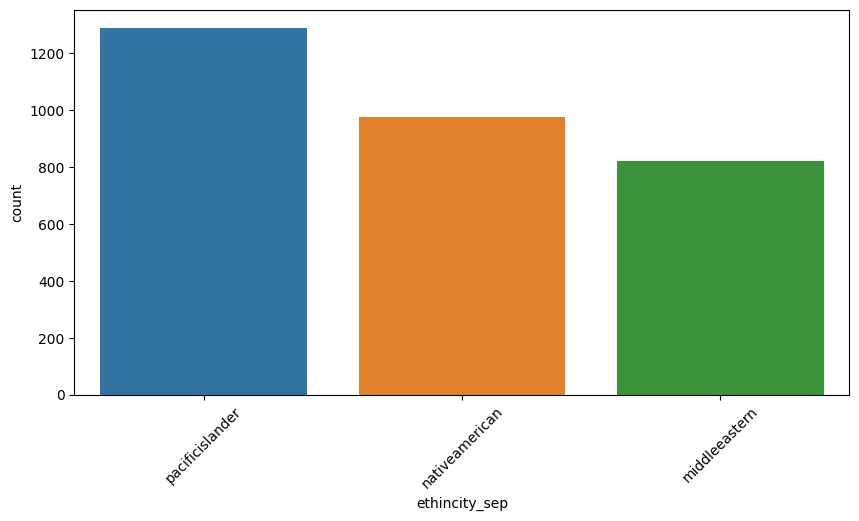

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=melted_df[melted_df["ethincity_sep"].isin(smallest)], x="ethincity_sep", order=smallest)
plt.xticks(rotation=45)

plt.show()


# Q4


## <div dir='rtl'> <span style="color: #5A5A5A">תדירות שליחת ההודעות של כל משתמש היא מספר ההודעות ששלח (messages_sent) חלקי הזמן בו קיים החשבון שלו (account_age). מצאו את חציון תדירות שליחת ההודעות של כל משתמש. מהו מספר המשתמשים שהם מעל החציון? שימרו מספר זה במשתנה amount_best_users והדפיסו אותו למסך.

<div dir='rtl'> הבהרה: הפלט הינו מספר בלבד


### ans

In [14]:
# Calculate average message rate (messages per year)
df['average_message_rate'] = df['messages_sent'] / df['account_age']

# Compute median average message rate
median_rate = df['average_message_rate'].median()

# Identify users above the median rate
best_users = df[df['average_message_rate'] > median_rate]
amount_best_users = len(best_users)
amount_best_users


29756

# Q5


## <div dir='rtl'> <span style="color: #5A5A5A">מאחר ומדובר בדאטה מאפליקציית הכירויות, כל משתתף יכול להגדיר מהו טווח הגילאים שהוא מעדיף עבור בן/בת הזוג. מצאו את טווח הגיל המועדף (preferred_age_range) שהגדירו משתתפים בני 25-40 (age) עם הכנסה (income) של מעל 80000
 

### ans

In [15]:
d_mode = df[(df.income > 80000) & (df.age.between(25, 40))]["preferred_age_range"].value_counts()
d_mode.index[0]

'24-34'

# Q6

## <div dir='rtl'> <span style="color: #5A5A5A">מצאו את שלושת תחומי העבודה work_industry) (מהם נשלחו הכי הרבה הודעות (messages_sent). הציגו איור המראה את ממוצע ההודעות שנשלחו בכל אחד משלושת התחומים האלו, תוך הבחנה בין כוונות הקשר (relationship_intent) של המשתמשים.
 

### ans

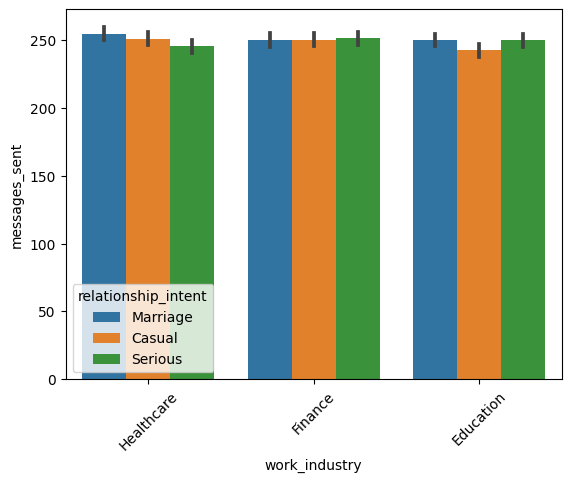

In [16]:
top_p = df.groupby(["work_industry"])['messages_sent'].count().reset_index().sort_values(by="messages_sent", ascending=False).head(3)
p1, p2, p3 = top_p.iloc[0, 0], top_p.iloc[1, 0], top_p.iloc[2, 0]
filtered_df = df[df["work_industry"].isin([p1, p2, p3])]

sns.barplot(data=filtered_df, x="work_industry", y="messages_sent", hue="relationship_intent")
plt.xticks(rotation=45)
plt.show()


# Q7



<div dir="rtl" style="text-align: right;">
הציגו באיור השוואה בין כמות הגברים והנשים (gender) שלא שותים (drinks) ולא עושים סמים (drugs) כלל.
</div>

### ans

<AxesSubplot: xlabel='variable', ylabel='count'>

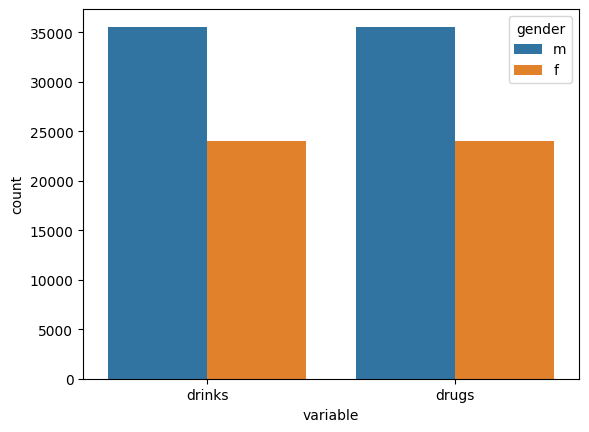

In [17]:
never_df = df[(df["drinks"]=="not at all")&(df["drugs"]=="never")]
ids = ['id',"gender"]
values = ['drinks','drugs']
melted_df = pd.melt(df, id_vars= ids, value_vars= values)
melted_df
sns.countplot(melted_df, x = "variable", hue = "gender")

another option:

<AxesSubplot: xlabel='drinks', ylabel='count'>

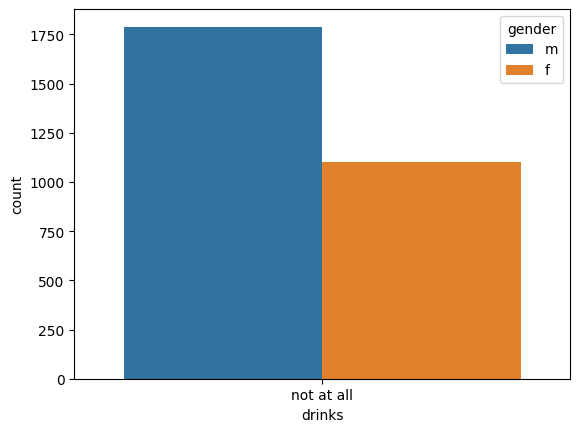

In [18]:
df7= df[(df['drugs'] =="never" ) & (df['drinks'] =="not at all")]
sns.countplot(data=df7, x = "drinks", hue = 'gender')


# Q8

## <div dir='rtl'> <span style="color: #5A5A5A">הציגו באיור את שתי קבוצות הגיל (age group) שנכנסו לאתר הכי הרבה (last_online) בשנה האחרונה. צבעו כל מגדר (gender) בצבע אחר. 

### ans

In [19]:
df["last_online"] = df["last_online"].astype(str).str[:10]

C:\Users\lihin\AppData\Local\Temp\ipykernel_26588\3342165944.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['last_online'] = pd.to_datetime(df['last_online'])


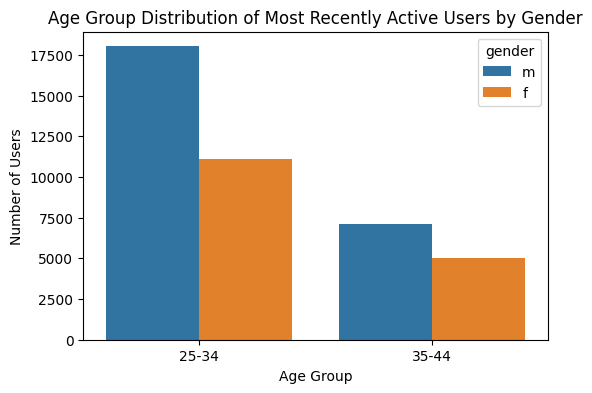

In [20]:
# Convert 'last_online' to datetime format
df['last_online'] = pd.to_datetime(df['last_online'])

# Extract year from 'last_online'
df['year'] = df['last_online'].dt.year

# Find the most recent login date
latest_login_date = df['year'].max()

# Get all users who were last online on this date
num_recent_users = df[df['year'] == latest_login_date]

# Find the two age groups with the highest counts
top_2_age_groups = num_recent_users['age_group'].value_counts().nlargest(2).index.tolist()

# Filter the dataset to include only the top 2 age groups with the highest counts
filtered_users = num_recent_users[num_recent_users['age_group'].isin(top_2_age_groups)]

# Plot gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_users, x='age_group', hue='gender', order=top_2_age_groups)
# Set labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.title("Age Group Distribution of Most Recently Active Users by Gender")

# Show the plot
plt.show()